# **Hardware Trojan identification and stoppage**

# **Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier 
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import StackingClassifier 
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt 
import seaborn as sns 
from imblearn.over_sampling import SMOTE


# **Data Collection**

In [2]:
df = pd.read_csv('Trojan_Detection.csv')
df

Unnamed: 0                                Flow ID    Source IP  \
0            73217    10.42.0.42-121.14.255.84-49975-80-6   10.42.0.42   
1            72089  172.217.6.226-10.42.0.42-443-49169-17   10.42.0.42   
2            96676       10.42.0.1-10.42.0.42-53-37749-17   10.42.0.42   
3            42891       10.42.0.1-10.42.0.42-53-41352-17   10.42.0.42   
4           169326  10.42.0.151-107.22.241.77-44353-443-6  10.42.0.151   
...            ...                                    ...          ...   
177477       40740     10.42.0.42-64.71.142.96-60811-80-6   10.42.0.42   
177478       82587     10.42.0.42-54.192.36.60-33004-80-6   10.42.0.42   
177479       66647   172.217.9.232-10.42.0.42-443-51049-6   10.42.0.42   
177480        7987       10.42.0.211-10.42.0.1-9145-53-17  10.42.0.211   
177481      167491    10.42.0.42-104.254.66.16-47389-80-6   10.42.0.42   

         Source Port  Destination IP   Destination Port   Protocol  \
0              49975   121.14.255.84                 80          6   
1              49169   172.217.6.226                443         17   
2              37749       10.42.0.1                 53         17   
3              41352       10.42.0.1                 53         17   
4              44353   107.22.241.77                443          6   
...              ...             ...                ...        ...   
177477         60811    64.71.142.96                 80          6   
177478         33004    54.192.36.60                 80          6   
177479         51049   172.217.9.232                443          6   
177480          9145       10.42.0.1                 53         17   
177481         47389   104.254.66.16                 80          6   

                  Timestamp   Flow Duration   Total Fwd Packets  ...  \
0       17/07/2017 01:18:33        10743584                   4  ...   
1       17/07/2017 10:25:25          254217                   6  ...   
2       30/06/2017 07:16:12         1023244                   1  ...   
3       13/07/2017 03:48:44          286483                   1  ...   
4       05/07/2017 10:47:35        65633087                  12  ...   
...                     ...             ...                 ...  ...   
177477  13/07/2017 03:50:57        40648037                   2  ...   
177478  17/07/2017 03:36:20         2037177                   2  ...   
177479  14/07/2017 03:45:27          397316                   9  ...   
177480  11/07/2017 10:16:27           32073                   1  ...   
177481  05/07/2017 09:18:02          360889                   2  ...   

         min_seg_size_forward  Active Mean   Active Std   Active Max  \
0                          20          0.0          0.0          0.0   
1                          20          0.0          0.0          0.0   
2                          32          0.0          0.0          0.0   
3                          20          0.0          0.0          0.0   
4                          32     322594.0          0.0     322594.0   
...                       ...          ...          ...          ...   
177477                     20          0.0          0.0          0.0   
177478                     32          0.0          0.0          0.0   
177479                     32          0.0          0.0          0.0   
177480                     44          0.0          0.0          0.0   
177481                     20          0.0          0.0          0.0   

         Active Min   Idle Mean   Idle Std    Idle Max    Idle Min   Class  
0               0.0         0.0        0.0         0.0         0.0  Trojan  
1               0.0         0.0        0.0         0.0         0.0  Trojan  
2               0.0         0.0        0.0         0.0         0.0  Benign  
3               0.0         0.0        0.0         0.0         0.0  Trojan  
4          322594.0  60306983.0        0.0  60306983.0  60306983.0  Benign  
...             ...         ...        ...         ...         ...     ...  
177477   

# **Data Analysis**

In [3]:
df.head()

Unnamed: 0                                Flow ID    Source IP  \
0       73217    10.42.0.42-121.14.255.84-49975-80-6   10.42.0.42   
1       72089  172.217.6.226-10.42.0.42-443-49169-17   10.42.0.42   
2       96676       10.42.0.1-10.42.0.42-53-37749-17   10.42.0.42   
3       42891       10.42.0.1-10.42.0.42-53-41352-17   10.42.0.42   
4      169326  10.42.0.151-107.22.241.77-44353-443-6  10.42.0.151   

    Source Port  Destination IP   Destination Port   Protocol  \
0         49975   121.14.255.84                 80          6   
1         49169   172.217.6.226                443         17   
2         37749       10.42.0.1                 53         17   
3         41352       10.42.0.1                 53         17   
4         44353   107.22.241.77                443          6   

             Timestamp   Flow Duration   Total Fwd Packets  ...  \
0  17/07/2017 01:18:33        10743584                   4  ...   
1  17/07/2017 10:25:25          254217                   6  ...   
2  30/06/2017 07:16:12         1023244                   1  ...   
3  13/07/2017 03:48:44          286483                   1  ...   
4  05/07/2017 10:47:35        65633087                  12  ...   

    min_seg_size_forward  Active Mean   Active Std   Active Max   Active Min  \
0                     20          0.0          0.0          0.0          0.0   
1                     20          0.0          0.0          0.0          0.0   
2                     32          0.0          0.0          0.0          0.0   
3                     20          0.0          0.0          0.0          0.0   
4                     32     322594.0          0.0     322594.0     322594.0   

    Idle Mean   Idle Std    Idle Max    Idle Min   Class  
0         0.0        0.0         0.0         0.0  Trojan  
1         0.0        0.0         0.0         0.0  Trojan  
2         0.0        0.0         0.0         0.0  Benign  
3         0.0        0.0         0.0         0.0  Trojan  
4  60306983.0        0.0  60306983.0  60306983.0  Benign  

[5 rows x 86 columns]

In [4]:
df.tail()

Unnamed: 0                               Flow ID    Source IP  \
177477       40740    10.42.0.42-64.71.142.96-60811-80-6   10.42.0.42   
177478       82587    10.42.0.42-54.192.36.60-33004-80-6   10.42.0.42   
177479       66647  172.217.9.232-10.42.0.42-443-51049-6   10.42.0.42   
177480        7987      10.42.0.211-10.42.0.1-9145-53-17  10.42.0.211   
177481      167491   10.42.0.42-104.254.66.16-47389-80-6   10.42.0.42   

         Source Port  Destination IP   Destination Port   Protocol  \
177477         60811    64.71.142.96                 80          6   
177478         33004    54.192.36.60                 80          6   
177479         51049   172.217.9.232                443          6   
177480          9145       10.42.0.1                 53         17   
177481         47389   104.254.66.16                 80          6   

                  Timestamp   Flow Duration   Total Fwd Packets  ...  \
177477  13/07/2017 03:50:57        40648037                   2  ...   
177478  17/07/2017 03:36:20         2037177                   2  ...   
177479  14/07/2017 03:45:27          397316                   9  ...   
177480  11/07/2017 10:16:27           32073                   1  ...   
177481  05/07/2017 09:18:02          360889                   2  ...   

         min_seg_size_forward  Active Mean   Active Std   Active Max  \
177477                     20          0.0          0.0          0.0   
177478                     32          0.0          0.0          0.0   
177479                     32          0.0          0.0          0.0   
177480                     44          0.0          0.0          0.0   
177481                     20          0.0          0.0          0.0   

         Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Class  
177477          0.0        0.0        0.0        0.0        0.0  Trojan  
177478          0.0        0.0        0.0        0.0        0.0  Trojan  
177479          0.0        0.0        0.0        0.0        0.0  Trojan  
177480          0.0        0.0        0.0        0.0        0.0  Trojan  
177481          0.0        0.0        0.0        0.0        0.0  Benign  

[5 rows x 86 columns]

In [5]:
df.shape

(177482, 86)

In [6]:
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177482 entries, 0 to 177481
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    177482 non-null  int64  
 1   Flow ID                       177482 non-null  object 
 2    Source IP                    177482 non-null  object 
 3    Source Port                  177482 non-null  int64  
 4    Destination IP               177482 non-null  object 
 5    Destination Port             177482 non-null  int64  
 6    Protocol                     177482 non-null  int64  
 7    Timestamp                    177482 non-null  object 
 8    Flow Duration                177482 non-null  int64  
 9    Total Fwd Packets            177482 non-null  int64  
 10   Total Backward Packets       177482 non-null  int64  
 11  Total Length of Fwd Packets   177482 non-null  float64
 12   Total Length of Bwd Packets  177482 non-nul

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Unnamed: 0         0
Flow ID            0
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
Idle Mean          0
 Idle Std          0
 Idle Max          0
 Idle Min          0
Class              0
Length: 86, dtype: int64

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.describe()

Unnamed: 0    Source Port   Destination Port       Protocol  \
count  177482.000000  177482.000000      177482.000000  177482.000000   
mean    88740.500000   38633.298729        5763.328969       8.295917   
std     51234.784576   18435.832044       15155.981517       4.540501   
min         0.000000       0.000000           0.000000       0.000000   
25%     44370.250000   34156.000000          80.000000       6.000000   
50%     88740.500000   43105.500000         443.000000       6.000000   
75%    133110.750000   52135.000000         443.000000       6.000000   
max    177481.000000   65530.000000       65267.000000      17.000000   

        Flow Duration   Total Fwd Packets   Total Backward Packets  \
count    1.774820e+05       177482.000000            177482.000000   
mean     1.163310e+07            6.743929                 9.908261   
std      2.302798e+07           29.655515               106.401351   
min      2.000000e+00            1.000000                 0.000000   
25%      4.690050e+04            1.000000                 0.000000   
50%      4.854025e+05            2.000000                 1.000000   
75%      1.062035e+07            5.000000                 4.000000   
max      1.199991e+08         4502.000000             12951.000000   

       Total Length of Fwd Packets   Total Length of Bwd Packets  \
count                177482.000000                  1.774820e+05   
mean                    811.919496                  1.023884e+04   
std                    6055.745405                  1.517666e+05   
min                       0.000000                  0.000000e+00   
25%                       0.000000                  0.000000e+00   
50%                      31.000000                  3.100000e+01   
75%                     451.000000                  4.950000e+02   
max                  846614.000000                  1.868497e+07   

        Fwd Packet Length Max  ...   act_data_pkt_fwd   min_seg_size_forward  \
count           177482.000000  ...      177482.000000          177482.000000   
mean               230.168969  ...           1.673894              27.802025   
std                392.025958  ...           6.848561               6.652046   
min                  0.000000  ...           0.000000              -1.000000   
25%                  0.000000  ...           0.000000              20.000000   
50%                 31.000000  ...           0.000000              32.000000   
75%                355.000000  ...           1.000000              32.000000   
max               1460.000000  ...         586.000000              60.000000   

        Active Mean    Active Std    Active Max    Active Min     Idle Mean  \
count  1.774820e+05  1.774820e+05  1.774820e+05  1.774820e+05  1.774820e+05   
mean   1.421356e+05  2.047529e+04  1.617342e+05  1.264388e+05  4.540725e+06   
std    7.798898e+05  2.469821e+05  8.791481e+05  7.506803e+05  1.542957e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    3.059421e+07  1.993857e+07  4.902243e+07  3.059421e+07  1.197736e+08   

           Idle Std      Idle Max      Idle Min  
count  1.774820e+05  1.774820e+05  1.774820e+05  
mean   4.024527e+05  4.894188e+06  4.234695e+06  
std    3.246955e+06  1.627581e+07  1.504980e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00  
max    7.445182e+07  1.197736e+08  1.197736e+08  

[8 rows x 81 columns]

In [12]:
df['Class'].value_counts()

Class
Trojan    90683
Benign    86799
Name: count, dtype: int64

In [13]:
df['Class'].unique()

array(['Trojan', 'Benign'], dtype=object)

In [14]:
df['Class'].nunique()

2

# **Data Preprocess**

# *Dropping Unrelated colums in Dataset*

In [15]:
df=df.drop(['Unnamed: 0'], axis=1)

In [16]:
df.head()

Flow ID    Source IP   Source Port  \
0    10.42.0.42-121.14.255.84-49975-80-6   10.42.0.42         49975   
1  172.217.6.226-10.42.0.42-443-49169-17   10.42.0.42         49169   
2       10.42.0.1-10.42.0.42-53-37749-17   10.42.0.42         37749   
3       10.42.0.1-10.42.0.42-53-41352-17   10.42.0.42         41352   
4  10.42.0.151-107.22.241.77-44353-443-6  10.42.0.151         44353   

   Destination IP   Destination Port   Protocol            Timestamp  \
0   121.14.255.84                 80          6  17/07/2017 01:18:33   
1   172.217.6.226                443         17  17/07/2017 10:25:25   
2       10.42.0.1                 53         17  30/06/2017 07:16:12   
3       10.42.0.1                 53         17  13/07/2017 03:48:44   
4   107.22.241.77                443          6  05/07/2017 10:47:35   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0        10743584                   4                        4  ...   
1          254217                   6                        7  ...   
2         1023244                   1                        1  ...   
3          286483                   1                        1  ...   
4        65633087                  12                       10  ...   

    min_seg_size_forward  Active Mean   Active Std   Active Max   Active Min  \
0                     20          0.0          0.0          0.0          0.0   
1                     20          0.0          0.0          0.0          0.0   
2                     32          0.0          0.0          0.0          0.0   
3                     20          0.0          0.0          0.0          0.0   
4                     32     322594.0          0.0     322594.0     322594.0   

    Idle Mean   Idle Std    Idle Max    Idle Min   Class  
0         0.0        0.0         0.0         0.0  Trojan  
1         0.0        0.0         0.0         0.0  Trojan  
2         0.0        0.0         0.0         0.0  Benign  
3         0.0        0.0         0.0         0.0  Trojan  
4  60306983.0        0.0  60306983.0  60306983.0  Benign  

[5 rows x 85 columns]

In [17]:
df.tail()

Flow ID    Source IP   Source Port  \
177477    10.42.0.42-64.71.142.96-60811-80-6   10.42.0.42         60811   
177478    10.42.0.42-54.192.36.60-33004-80-6   10.42.0.42         33004   
177479  172.217.9.232-10.42.0.42-443-51049-6   10.42.0.42         51049   
177480      10.42.0.211-10.42.0.1-9145-53-17  10.42.0.211          9145   
177481   10.42.0.42-104.254.66.16-47389-80-6   10.42.0.42         47389   

        Destination IP   Destination Port   Protocol            Timestamp  \
177477    64.71.142.96                 80          6  13/07/2017 03:50:57   
177478    54.192.36.60                 80          6  17/07/2017 03:36:20   
177479   172.217.9.232                443          6  14/07/2017 03:45:27   
177480       10.42.0.1                 53         17  11/07/2017 10:16:27   
177481   104.254.66.16                 80          6  05/07/2017 09:18:02   

         Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
177477        40648037                   2                        0  ...   
177478         2037177                   2                        0  ...   
177479          397316                   9                        7  ...   
177480           32073                   1                        1  ...   
177481          360889                   2                        0  ...   

         min_seg_size_forward  Active Mean   Active Std   Active Max  \
177477                     20          0.0          0.0          0.0   
177478                     32          0.0          0.0          0.0   
177479                     32          0.0          0.0          0.0   
177480                     44          0.0          0.0          0.0   
177481                     20          0.0          0.0          0.0   

         Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Class  
177477          0.0        0.0        0.0        0.0        0.0  Trojan  
177478          0.0        0.0        0.0        0.0        0.0  Trojan  
177479          0.0        0.0        0.0        0.0        0.0  Trojan  
177480          0.0        0.0        0.0        0.0        0.0  Trojan  
177481          0.0        0.0        0.0        0.0        0.0  Benign  

[5 rows x 85 columns]

In [18]:
df.shape

(177482, 85)

In [19]:
df.isnull().sum()

Flow ID              0
 Source IP           0
 Source Port         0
 Destination IP      0
 Destination Port    0
                    ..
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
Class                0
Length: 85, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177482 entries, 0 to 177481
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       177482 non-null  object 
 1    Source IP                    177482 non-null  object 
 2    Source Port                  177482 non-null  int64  
 3    Destination IP               177482 non-null  object 
 4    Destination Port             177482 non-null  int64  
 5    Protocol                     177482 non-null  int64  
 6    Timestamp                    177482 non-null  object 
 7    Flow Duration                177482 non-null  int64  
 8    Total Fwd Packets            177482 non-null  int64  
 9    Total Backward Packets       177482 non-null  int64  
 10  Total Length of Fwd Packets   177482 non-null  float64
 11   Total Length of Bwd Packets  177482 non-null  float64
 12   Fwd Packet Length Max        177482 non-nul

# *Lable Encoder: To convert object Into Int*

In [21]:
# Store object column names
original_columns = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    # Replace NaN with a placeholder and convert to string
    df[col] = df[col].fillna('missing').astype(str)
    
    # Initialize and apply LabelEncoder
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")
    print("=====================")

Mapping for column 'Flow ID':
Label 0: 1.31.173.11-10.42.0.151-80-46369-6
Label 1: 1.31.173.11-10.42.0.151-80-46370-6
Label 2: 1.31.173.11-10.42.0.42-80-43159-6
Label 3: 1.31.173.11-10.42.0.42-80-43160-6
Label 4: 1.31.173.11-10.42.0.42-80-43161-6
Label 5: 1.31.173.11-10.42.0.42-80-52844-6
Label 6: 1.31.173.11-10.42.0.42-80-52847-6
Label 7: 1.31.173.21-10.42.0.42-80-46892-6
Label 8: 1.31.173.21-10.42.0.42-80-46893-6
Label 9: 1.31.173.21-10.42.0.42-80-46894-6
Label 10: 1.31.173.21-10.42.0.42-80-46895-6
Label 11: 1.31.173.21-10.42.0.42-80-46959-6
Label 12: 1.31.173.33-10.42.0.42-80-33861-6
Label 13: 1.31.173.33-10.42.0.42-80-33862-6
Label 14: 1.31.173.33-10.42.0.42-80-33863-6
Label 15: 1.31.173.33-10.42.0.42-80-33864-6
Label 16: 10.42.0.1-10.42.0.42-32878-5351-17
Label 17: 10.42.0.1-10.42.0.42-33312-5351-17
Label 18: 10.42.0.1-10.42.0.42-34096-5351-17
Label 19: 10.42.0.1-10.42.0.42-34309-5351-17
Label 20: 10.42.0.1-10.42.0.42-34872-5351-17
Label 21: 10.42.0.1-10.42.0.42-36080-5351-17
Labe

In [22]:
df.head()

Flow ID   Source IP   Source Port   Destination IP   Destination Port  \
0    46111           7         49975              352                 80   
1    74905           7         49169              895                443   
2     9217           7         37749                7                 53   
3    10418           7         41352                7                 53   
4    20763           5         44353              220                443   

    Protocol   Timestamp   Flow Duration   Total Fwd Packets  \
0          6       36269        10743584                   4   
1         17       39241          254217                   6   
2         17       42069         1023244                   1   
3         17       29885          286483                   1   
4          6       16589        65633087                  12   

    Total Backward Packets  ...   min_seg_size_forward  Active Mean  \
0                        4  ...                     20          0.0   
1                        7  ...                     20          0.0   
2                        1  ...                     32          0.0   
3                        1  ...                     20          0.0   
4                       10  ...                     32     322594.0   

    Active Std   Active Max   Active Min   Idle Mean   Idle Std    Idle Max  \
0          0.0          0.0          0.0         0.0        0.0         0.0   
1          0.0          0.0          0.0         0.0        0.0         0.0   
2          0.0          0.0          0.0         0.0        0.0         0.0   
3          0.0          0.0          0.0         0.0        0.0         0.0   
4          0.0     322594.0     322594.0  60306983.0        0.0  60306983.0   

     Idle Min  Class  
0         0.0      1  
1         0.0      1  
2         0.0      0  
3         0.0      1  
4  60306983.0      0  

[5 rows x 85 columns]

In [23]:
df.tail()

Flow ID   Source IP   Source Port   Destination IP   Destination Port  \
177477    54441           7         60811             2817                 80   
177478    52664           7         33004             2512                 80   
177479    76988           7         51049              943                443   
177480    30452           6          9145                7                 53   
177481    41054           7         47389              112                 80   

         Protocol   Timestamp   Flow Duration   Total Fwd Packets  \
177477          6       29969        40648037                   2   
177478          6       38763         2037177                   2   
177479          6       32912          397316                   9   
177480         17       26598           32073                   1   
177481          6       15700          360889                   2   

         Total Backward Packets  ...   min_seg_size_forward  Active Mean  \
177477                        0  ...                     20          0.0   
177478                        0  ...                     32          0.0   
177479                        7  ...                     32          0.0   
177480                        1  ...                     44          0.0   
177481                        0  ...                     20          0.0   

         Active Std   Active Max   Active Min  Idle Mean   Idle Std  \
177477          0.0          0.0          0.0        0.0        0.0   
177478          0.0          0.0          0.0        0.0        0.0   
177479          0.0          0.0          0.0        0.0        0.0   
177480          0.0          0.0          0.0        0.0        0.0   
177481          0.0          0.0          0.0        0.0        0.0   

         Idle Max   Idle Min  Class  
177477        0.0        0.0      1  
177478        0.0        0.0      1  
177479        0.0        0.0      1  
177480        0.0        0.0      1  
177481        0.0        0.0      0  

[5 rows x 85 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177482 entries, 0 to 177481
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       177482 non-null  int32  
 1    Source IP                    177482 non-null  int32  
 2    Source Port                  177482 non-null  int64  
 3    Destination IP               177482 non-null  int32  
 4    Destination Port             177482 non-null  int64  
 5    Protocol                     177482 non-null  int64  
 6    Timestamp                    177482 non-null  int32  
 7    Flow Duration                177482 non-null  int64  
 8    Total Fwd Packets            177482 non-null  int64  
 9    Total Backward Packets       177482 non-null  int64  
 10  Total Length of Fwd Packets   177482 non-null  float64
 11   Total Length of Bwd Packets  177482 non-null  float64
 12   Fwd Packet Length Max        177482 non-nul

In [25]:
df["Class"].value_counts()

Class
1    90683
0    86799
Name: count, dtype: int64

# **Data Splitting**

In [26]:
df.shape

(177482, 85)

In [27]:
x = df.drop(['Class'], axis=1)
y = df['Class']

In [28]:
x.shape

(177482, 84)

In [29]:
y.shape

(177482,)

In [30]:
y.value_counts()

Class
1    90683
0    86799
Name: count, dtype: int64

In [31]:
smote = SMOTE(random_state=42)
x_resample, y_resample = smote.fit_resample(x, y)

In [32]:
y_resample.value_counts()

Class
1    90683
0    90683
Name: count, dtype: int64

# *Applying SelectKBest*

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder 


# Apply SelectKBest to select the top 10 features
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
x_new = selector.fit_transform(x_resample, y_resample)

# Get selected feature names
selected_features = x_resample.columns[selector.get_support()] 
# Create a new DataFrame with selected features
x_selected = pd.DataFrame(x_new, columns=selected_features)

# Create a dataframe to show feature scores
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Display the top features
print(feature_scores.head(10))  
# feature_scores.head(10).to_csv("top_features.csv", index=False)
print("Top features saved to 'top_features.csv'")


            Feature          Score
6         Timestamp  197279.805479
26    Fwd IAT Total     502.012856
29      Fwd IAT Max     489.297101
82         Idle Max     423.762161
0           Flow ID     403.696631
79       Active Min     357.367871
43    Bwd Packets/s     354.273471
76      Active Mean     352.972962
80        Idle Mean     351.448428
3    Destination IP     313.329130
Top features saved to 'top_features.csv'


C:\Users\0983\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [37 38 39 51 55 56 62 63 64 65 66 67] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\0983\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [34]:
x_selected

Flow ID   Destination IP   Timestamp  Fwd IAT Total   Fwd IAT Max  \
0       46111.0            352.0     36269.0   7.484060e+05  3.766060e+05   
1       74905.0            895.0     39241.0   1.916480e+05  7.535500e+04   
2        9217.0              7.0     42069.0   0.000000e+00  0.000000e+00   
3       10418.0              7.0     29885.0   0.000000e+00  0.000000e+00   
4       20763.0            220.0     16589.0   6.063365e+07  6.031106e+07   
...         ...              ...         ...            ...           ...   
181361  82780.0           1185.0     14265.0   1.659468e+05  1.659468e+05   
181362  83509.0             11.0      2444.0   0.000000e+00  0.000000e+00   
181363  17145.0              7.0      3610.0   0.000000e+00  0.000000e+00   
181364  94058.0           1517.0     13322.0   0.000000e+00  0.000000e+00   
181365  76491.0            931.0      8542.0   2.160409e+06  2.160409e+06   

         Bwd Packets/s  Active Mean   Active Min   Idle Mean    Idle Max  
0             0.372315          0.0          0.0         0.0         0.0  
1            27.535531          0.0          0.0         0.0         0.0  
2             0.977284          0.0          0.0         0.0         0.0  
3             3.490609          0.0          0.0         0.0         0.0  
4             0.152362     322594.0     322594.0  60306983.0  60306983.0  
...                ...          ...          ...         ...         ...  
181361        0.000000          0.0          0.0         0.0         0.0  
181362      386.093020          0.0          0.0         0.0         0.0  
181363       21.115212          0.0          0.0         0.0         0.0  
181364        3.941616          0.0          0.0         0.0         0.0  
181365        0.000000          0.0          0.0         0.0         0.0  

[181366 rows x 10 columns]

In [35]:
x_selected.head(10)

Flow ID   Destination IP   Timestamp  Fwd IAT Total   Fwd IAT Max  \
0  46111.0            352.0     36269.0       748406.0      376606.0   
1  74905.0            895.0     39241.0       191648.0       75355.0   
2   9217.0              7.0     42069.0            0.0           0.0   
3  10418.0              7.0     29885.0            0.0           0.0   
4  20763.0            220.0     16589.0     60633649.0    60311055.0   
5  29389.0              7.0     24219.0            0.0           0.0   
6  56249.0           3007.0     31121.0         3096.0        1859.0   
7  55018.0           2859.0      3378.0            0.0           0.0   
8   8266.0              7.0     30214.0            0.0           0.0   
9  62956.0              8.0      8909.0          314.0         314.0   

    Bwd Packets/s  Active Mean   Active Min   Idle Mean    Idle Max  
0        0.372315          0.0          0.0         0.0         0.0  
1       27.535531          0.0          0.0         0.0         0.0  
2        0.977284          0.0          0.0         0.0         0.0  
3        3.490609          0.0          0.0         0.0         0.0  
4        0.152362     322594.0     322594.0  60306983.0  60306983.0  
5        3.978738          0.0          0.0         0.0         0.0  
6        0.000000          0.0          0.0         0.0         0.0  
7     4228.329810          0.0          0.0         0.0         0.0  
8        1.794015          0.0          0.0         0.0         0.0  
9        0.000000          0.0          0.0         0.0         0.0

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_selected, y_resample, test_size=0.2, random_state=42)

In [37]:
x_train.shape

(145092, 10)

In [38]:
x_test.shape

(36274, 10)

In [39]:
x_test.head()

Flow ID   Destination IP   Timestamp  Fwd IAT Total   Fwd IAT Max  \
88778    6649.0              7.0     34952.0            0.0           0.0   
126847  85077.0           1253.0      6977.0     35089107.0    35043079.0   
108436  10771.0              7.0     35351.0            0.0           0.0   
120764  59268.0            471.0     20697.0          121.0         121.0   
23177   92702.0              9.0     23690.0            0.0           0.0   

         Bwd Packets/s  Active Mean   Active Min   Idle Mean    Idle Max  
88778        40.909835          0.0          0.0         0.0         0.0  
126847        0.000000      46028.0      46028.0  35043079.0  35043079.0  
108436       31.740993          0.0          0.0         0.0         0.0  
120764        0.000000          0.0          0.0         0.0         0.0  
23177       435.729847          0.0          0.0         0.0         0.0

In [38]:
y_train.shape

(145092,)

In [39]:
y_test.shape

(36274,)

# **Model Train**

# *Decision Tree*

Training accuracy: 1.0
Testing accuracy: 0.9987043061145724
Accuracy of Decision Tree:  0.9987043061145724
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18076
           1       1.00      1.00      1.00     18198

    accuracy                           1.00     36274
   macro avg       1.00      1.00      1.00     36274
weighted avg       1.00      1.00      1.00     36274

confusion_matrix:  [[18053    23]
 [   24 18174]]


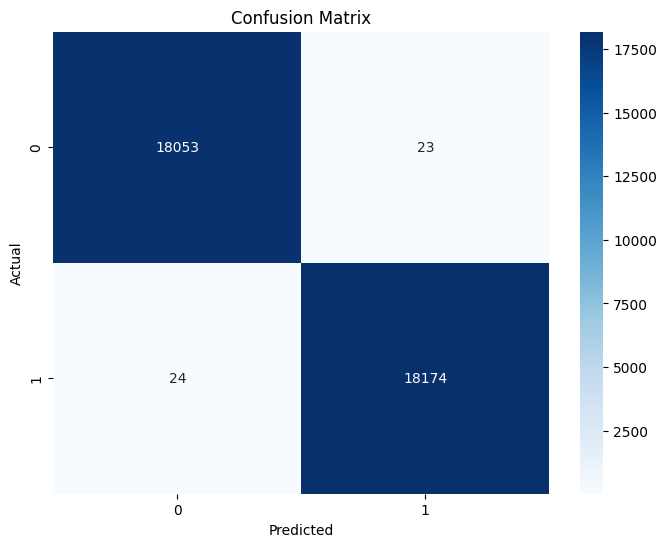

In [40]:
#DecisionTree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_predict_train = dt.predict(x_train)
ac_dt = accuracy_score(dt_predict_train, y_train)
print("Training accuracy:", ac_dt)


dt_predict_test = dt.predict(x_test)
ac_dt1 = accuracy_score(dt_predict_test, y_test)
print("Testing accuracy:", ac_dt1) 

accuracy_dt = accuracy_score(y_test, dt_predict_test)
print("Accuracy of Decision Tree: ", accuracy_dt)
report = classification_report(y_test, dt_predict_test) 
print("classification_report:\n", report)
conf_matrix = confusion_matrix(y_test, dt_predict_test)
print("confusion_matrix: ", conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Training Accuracy: 1.0
Testing accuracy: 0.998842145889618
Accuracy of Random Forest:  0.998842145889618
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18076
           1       1.00      1.00      1.00     18198

    accuracy                           1.00     36274
   macro avg       1.00      1.00      1.00     36274
weighted avg       1.00      1.00      1.00     36274



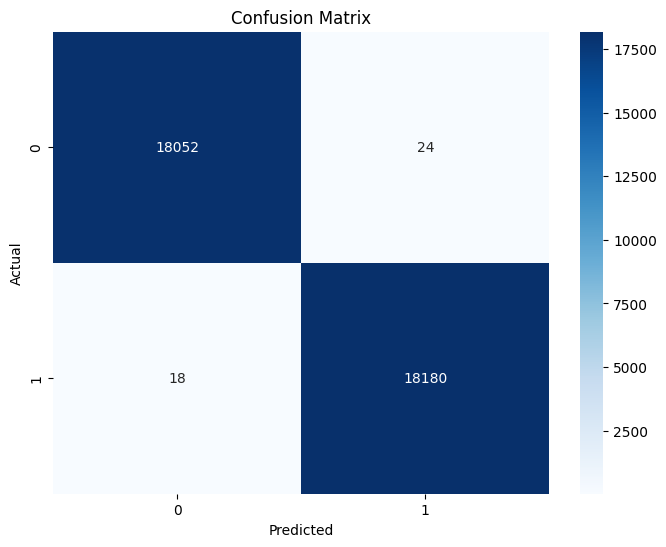

In [41]:
#RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

rf_predit_train = rf.predict(x_train)
ac_rf = accuracy_score(rf_predit_train, y_train)
print("Training Accuracy:", ac_rf)

rf_predict_test = rf.predict(x_test)
ac_rf1 = accuracy_score(rf_predict_test, y_test)
print("Testing accuracy:", ac_rf1) 

accuracy_rf = accuracy_score(y_test, rf_predict_test)
print("Accuracy of Random Forest: ", accuracy_rf)
report = classification_report(y_test, rf_predict_test)
print("Classification_report:\n", report)

conf_matrix = confusion_matrix(y_test, rf_predict_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [49]:
input = [[46111.0, 352.0, 36269.0, 7.484060e+05,	3.766060e+05, 0.372315, 0.0, 0.0, 0.0, 0.0]]
input1 = [[74905.0, 895.0, 39241.0, 191648.0, 75355.0, 27.535531, 0.0, 0.0, 0.0, 0.0]]
input2 = [[9217.0, 7.0, 42069.0, 0.0, 0.0, 0.977284, 0.0, 0.0, 0.0, 0.0]]
res = rf.predict(input1)
print(res)

[1]


C:\Users\0983\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# *Logistic Regression*

C:\Users\0983\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Trainning accuracy: 0.7867904501971164
Testing Accuracy:  0.7880299939350499
Accuracy of Logistic Regresion:  0.7880299939350499
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.70      0.77     18076
           1       0.75      0.87      0.80     18198

    accuracy                           0.79     36274
   macro avg       0.80      0.79      0.79     36274
weighted avg       0.80      0.79      0.79     36274



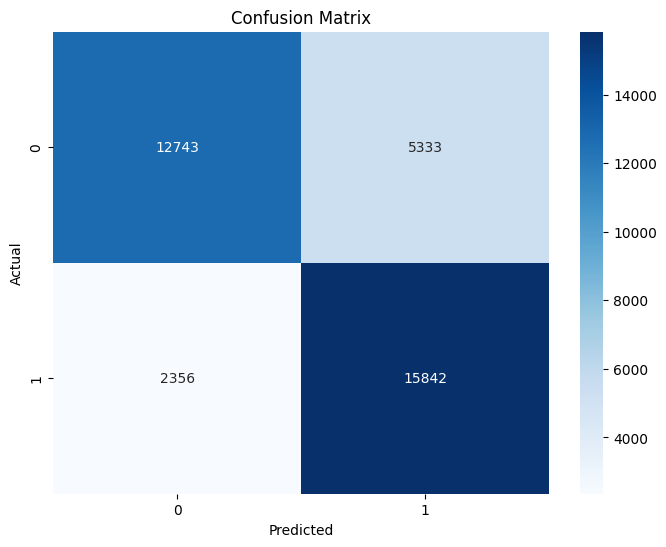

In [42]:

lg = LogisticRegression()
lg.fit(x_train, y_train)

lg_predict_train = lg.predict(x_train)
ac_lg = accuracy_score(lg_predict_train, y_train)
print("Trainning accuracy:", ac_lg)

lg_predict_test = lg.predict(x_test)
ac_lg = accuracy_score(lg_predict_test, y_test)
print("Testing Accuracy: ", ac_lg) 

accuracy_lr = accuracy_score(y_test, lg_predict_test)
print("Accuracy of Logistic Regresion: ", accuracy_lr)
report = classification_report(y_test, lg_predict_test)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, lg_predict_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# *XGBoost Classifier*

Accuracy of Training:  0.9992556446944008
Accuracy of Testing:  0.9978772674642995
Accuracy of XGBoost Classifier:  0.9978772674642995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18076
           1       1.00      1.00      1.00     18198

    accuracy                           1.00     36274
   macro avg       1.00      1.00      1.00     36274
weighted avg       1.00      1.00      1.00     36274



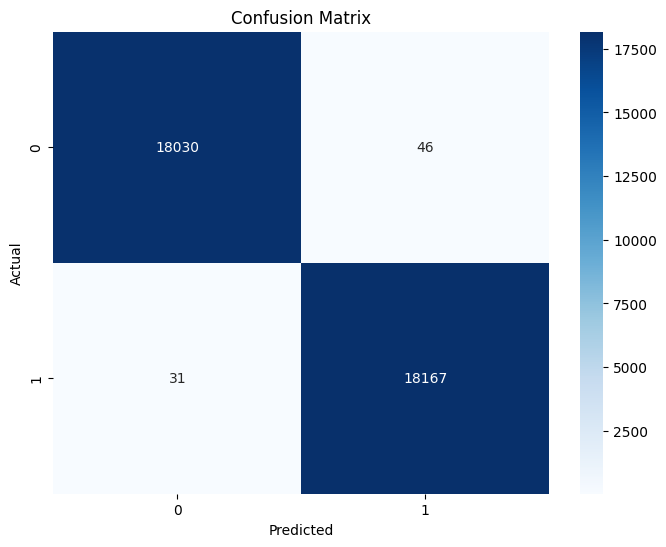

In [43]:

from xgboost import XGBClassifier 
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_predict_train = xgb.predict(x_train) 
xgb_train_acc = accuracy_score(y_train, xgb_predict_train)
print("Accuracy of Training: ", xgb_train_acc)

xgb_predict_test = xgb.predict(x_test)
xgb_test_acc = accuracy_score(y_test, xgb_predict_test)
print("Accuracy of Testing: ", xgb_test_acc)

accuracy_xgb = accuracy_score(y_test, xgb_predict_test)
print("Accuracy of XGBoost Classifier: ", accuracy_xgb)
report = classification_report(y_test, xgb_predict_test)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, xgb_predict_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# *CNN*

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [77]:
# One-Hot Encode the target variable (for categorical classification)
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_encoded = one_hot_encoder.fit_transform(y.values.reshape(-1, 1))

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_selected)

x_reshaped = x_scaled.reshape(x_scaled.shape[0], x_scaled.shape[1], 1) 

X_train, X_test, y_train, y_test = train_test_split(x_reshaped, y_encoded, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training set shape:", y_train.shape)
print("Testing set shape:", y_test.shape)

Training set shape: (141985, 10, 1)
Testing set shape: (35497, 10, 1)
Training set shape: (141985, 2)
Testing set shape: (35497, 2)


In [78]:
# Create CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_encoded.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of model
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 8, 64)             256       
                                                                 
 batch_normalization_14 (Ba  (None, 8, 64)             256       
 tchNormalization)                                               
                                                                 
 max_pooling1d_14 (MaxPooli  (None, 4, 64)             0         
 ng1D)                                                           
                                                                 
 conv1d_15 (Conv1D)          (None, 2, 128)            24704     
                                                                 
 batch_normalization_15 (Ba  (None, 2, 128)            512       
 tchNormalization)                                               
                                                      

In [79]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


Epoch 1/50


4438/4438 [==============================] - 38s 7ms/step - loss: 0.1206 - accuracy: 0.9583 - val_loss: 0.0830 - val_accuracy: 0.9744
Epoch 2/50
4438/4438 [==============================] - 33s 8ms/step - loss: 0.0788 - accuracy: 0.9748 - val_loss: 0.0669 - val_accuracy: 0.9768
Epoch 3/50
4438/4438 [==============================] - 34s 8ms/step - loss: 0.0683 - accuracy: 0.9786 - val_loss: 0.0768 - val_accuracy: 0.9721
Epoch 4/50
4438/4438 [==============================] - 33s 7ms/step - loss: 0.0612 - accuracy: 0.9803 - val_loss: 0.0893 - val_accuracy: 0.9732
Epoch 5/50
4438/4438 [==============================] - 33s 7ms/step - loss: 0.0560 - accuracy: 0.9823 - val_loss: 0.0481 - val_accuracy: 0.9823
Epoch 6/50
4438/4438 [==============================] - 33s 8ms/step - loss: 0.0526 - accuracy: 0.9828 - val_loss: 0.0526 - val_accuracy: 0.9840
Epoch 7/50
4438/4438 [==============================] - 35s 8ms/step - loss: 0.0510 - accuracy: 0.9836 - val_loss: 0.0388 - val_

In [80]:
model.save_weights("cnn_model_weights.h5")